In [6]:
# HIDE
import pandas as pd
import numpy as np
np.random.seed(7)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True, context="talk")
from IPython import display
%matplotlib inline

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

import keras as ke
import keras.backend as K
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.models import load_model


create_gif = False

# model reconstruction from JSON:
from keras.models import model_from_json

print(f"sklearn: {sk.__version__}")
print(f"pandas: {pd.__version__}")
print(f"kerads: {ke.__version__}")


import src.my_functions_product1 as myFC
import src.Analyzing_results as myAR
import src.Process as myPR
import matplotlib.pyplot as plt

sklearn: 0.19.1
pandas: 0.23.0
kerads: 2.1.6


In [7]:
input_option = 'not manual'
#-----------------------------------------------
#feature_path = 'Feature-Datasets/adult/'
#data_filename = 'adult.data'

feature_path = 'Feature-Datasets/bank/'
data_filename = 'bank.csv'

user_main_json_text_file = 'user1_main_task_arch_json_string_file.txt'
user_adv_json_text_file = 'user1_adv_task_arch_json_string_file.txt'
h5_filename = 'user1_main_task_ori_trained_model.h5'
lambda_file = 'tuning_range.txt'
p_threshold = 0.8 *100




In [8]:
Bacc_Bp_Aacc_Ap_results,lambda_to_save,result_fname,Z_test, y_test = myPR.Main_Product(input_option,feature_path, data_filename,
                                                                                       user_main_json_text_file,user_adv_json_text_file,
                                                                                       h5_filename,
                                                                                       lambda_file,p_threshold)


Feature-Datasets/bank/user1_main_task_arch_json_string_file.txt
Accuracy: 90.97
tradeoff_lambda =  40.0
Accuracy: 91.29
Accuracy: 88.94
tradeoff_lambda =  50.0
Accuracy: 91.29
Accuracy: 89.05
tradeoff_lambda =  60.0
Accuracy: 91.29
Accuracy: 89.06
Great, we have an updated classifier satisfying the fairness. 
Accuracy is reduced from 0.91, to 0.89:
Fairness (p-score) is improved from 27.17, to 87.11


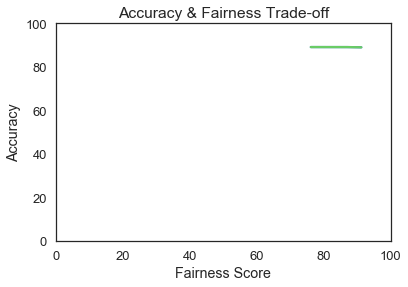

In [9]:
myAR.saving_trade_off_figures(feature_path, Bacc_Bp_Aacc_Ap_results)

Sensitive Class 0 w/o fairness FNR= 0.35, FPR= 0.19
Sensitive Class 1 w/o fairness FNR= 0.44, FPR= 0.04
Sensitive Class 0 w/ fairness FNR= 0.82, FPR= 0.05
Sensitive Class 1 w/ fairness FNR= 0.60, FPR= 0.04
-------------------------------------------------------

FNR for class 1 is reduced from 0.44 to 0.60
FPR for class 0 is reduced from 0.19 to 0.05


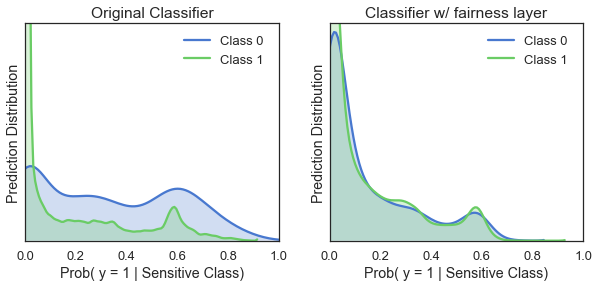

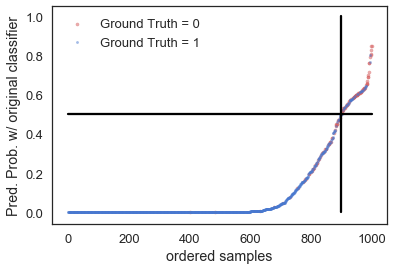

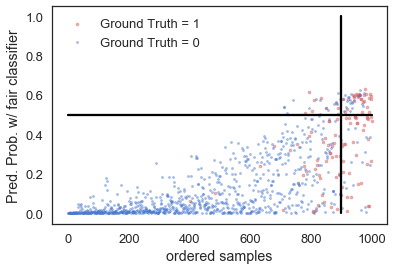

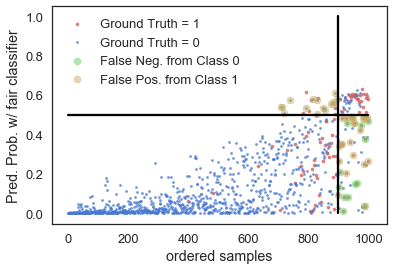

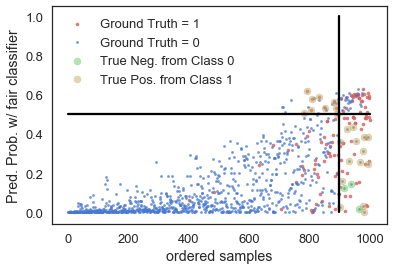

In [10]:
# a good fairness point is achieved
if lambda_to_save>0:
    result_fname_y_pred_before_after = result_fname + 'Result_y_pred_'+'L' + str(lambda_to_save) +'.txt'
    BA_y_pred = np.loadtxt(result_fname_y_pred_before_after, delimiter=',')
    
    myAR.FNR_FPR_analysis(BA_y_pred,lambda_to_save, Z_test, y_test)
    myAR.Prediction_distribution_analysis(BA_y_pred,feature_path,Z_test)
    myAR.comparing_decisions_of_classifiers(y_test,Z_test, BA_y_pred,feature_path)